## One-Way Analysis of Variance (ANOVA)

To compare the means of two independent samples of internval or ratio data (assuming the samples are from normally distributed populations having equal variance) we can do a t-test. But what if you have more than two groups that you want to compare? You could do multiple t-tests, one for each pairing of groups. But this approach would increase the likelhood of experiencing a type-1 error, that is, of rejecting the null hypothesis when you should not have done so (false positive). The practice of doing repeated t-tests between multiple variables in the search for p-values less than 0.05 is sometimes called p-hacking or data dredging. A better approach is to do an analysis of variance (ANOVA) test. Think of ANOVA as testing all groups simultaneously and looking for statistical evidence that at least one of the groups is different than any of the others. We will focus on one-way ANOVA were there is only one factor that is different between groups. If ANOVA reveals that at least one of the groups is different than the others, a follow up test or post-hoc test is necessary to uncover which group or groups are different from the others. A popular post-hoc test demonstrated here is called Tukey's range test.

After this notebook you will know:
* how to conduct one-way ANOVA (analysis of variance) between multiple groups of interval or ratio data.
* how to do a Tukey's range test.

### About the Data

The dataset we will work with is from an experiment testing the connection between red dye no. 40 and the occurance of cancer in mice. There are three treatment groups receiving different size doses and a control. Here are some more details about the data.

Name: reddye40.csv

Title: Red Dye 40 and Cancer in Mice

Source: Journal Natl. Cancer Inst., Vol. 66, p 197-212

Description: S.W. Laagakos and F. Mosteller of Harvard University fed mice different doses of red dye number 40 and recorded the time of death in weeks. Results for female mice, dosage and time of death are shown in the data:
* X1 = time of death for control group
* X2 = time of death for group with low dosage
* X3 = time of death for group with medium dosage
* X4 = time of death for group with high dosage

The following cell will import the red dye 40 cancer data using pandas. The data is formated as a CSV (comma-separated-values) file. Such a file could be opend in Excel but here we simply load the file into a pandas data structure called a dataframe and print out the first couple rows of the dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # some useful stuff
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/reddye40.csv"
reddye = pd.read_csv(url)

In [2]:
reddye

,X1 control,X2 low dose,X3 medium dose,X4 high dose
0,70,49.0,30.0,34.0
1,77,60.0,37.0,36.0
2,83,63.0,56.0,48.0
3,87,67.0,65.0,48.0
4,92,70.0,76.0,65.0
5,93,74.0,83.0,91.0
6,100,77.0,87.0,98.0
7,102,80.0,90.0,102.0
8,102,89.0,94.0,NaN
9,103,NaN,97.0,NaN


### One-Way ANOVA Hypothesis Testing

ANOVA allows us to test the null hypothesis that their is no difference between the means of different groups in a study. For the red dye 40 data the null hypothesis would be that there is no difference between the mean time of death in weeks between mice receiving no dose (control), a low dose, a medium dose, or a high dose of red dye 40.
* H<sub>0</sub>: x1_bar = x2_bar = x3_bar = x4_bar at &alpha; = 0.05
* H<sub>A</sub>: The means are not all equal. That is, at least one of the means is different from the rest. 

The test statistic for ANOVA is called the F-statistic and is defined as the ratio of mean squared error between groups divided by the mean squared error within groups. 

F = MSB/MSE

where

MSB = SUM(nj(xj_bar - x_bar)^2) / (k-1) 

* The sum is taken over all k groups, nj is the number of data values in group j, xj_bar is the mean of group j, x_bar is the grand mean, which is the mean of all data values in all groups. The degrees of freedom between groups is k-1

MSE = SUM(SUM(x-xj_bar)^2) / (N-k)

* The inner sum is taken over all data values in group j and the other sum is taken over all k groups. The degrees of freedom within groups is N-k, where N is the total number of data values in all groups.

The F-critical value for the stated significance level can be found in F-tables like [these](http://www.socr.ucla.edu/applets.dir/f_table.html) or using a calculator like [this one](https://www.danielsoper.com/statcalc/calculator.aspx?id=4). There is a different F-table for each significance level. The columns are for different between group degrees of freedom (k-1) and the rows are for different within group degrees of freedom (N-k). For the red dye data dfB = k-1 = 3 and dfW = N - k = 38 giving a F-critical value of 2.85174134.

Below the F-statistic is calculated using the formulas above and again using a built in python function that is much easier to use.

**NOTE: ANOVA assumes that the data in each group is normally distributed and the various groups have uniform variance. In practice, the ANOVA test works well if the data is decently normal and the smallest group variance is no more than 3 times smaller than the largest group variance. (More arbitrary rules?)**

In [3]:
# FIRST LET'S PULL OUT THE FOUR GROUPS. Notice that the number of mice in each sample is different.
groups = ['X1 control', 'X2 low dose', 'X3 medium dose', 'X4 high dose']
x1 = reddye[reddye[groups[0]]>0][groups[0]]
x2 = reddye[reddye[groups[1]]>0][groups[1]]
x3 = reddye[reddye[groups[2]]>0][groups[2]]
x4 = reddye[reddye[groups[3]]>0][groups[3]]

# NOW LET'S FIND THE SIZE OF EACH GROUP ...
n1 = len(x1)
n2 = len(x2)
n3 = len(x3)
n4 = len(x4)
N = n1+n2+n3+n4 # 38 data values in all groups

# AND CALCULATE dfB and dfW
k = 4 # 4 groups
dfB = k-1
dfW = N-k

In [4]:
# NOW CALCULATE THE GRAND MEAN ...
x_bar = (n1*x1.mean() + n2*x2.mean() + n3*x3.mean() + n4*x4.mean())/N
print(x_bar)

75.55263157894737


In [5]:
# THE SUM OF SQUARES BETWEEN GROUPS ...
SSB = n1*(x1.mean()-x_bar)**2 + n2*(x2.mean()-x_bar)**2 + n3*(x3.mean()-x_bar)**2 + n4*(x4.mean()-x_bar)**2
print(SSB)
# AND THE SUM OF SQUARES WITHIN GROUPS ...
SSW = sum(((x1 - x1.mean()))**2) + sum(((x2 - x2.mean()))**2) + sum(((x3 - x3.mean()))**2) + sum(((x4 - x4.mean()))**2)
print(SSW)

# NOW CALCULATE THE F-STATISTIC
F = (SSB/dfB)/(SSW/dfW)
print("F = ", F)

4051.9603934077604
12937.434343434343
F =  3.5495614178911623


In [6]:
# Now, let's do this the easy way using a stats function.
F, p = stats.f_oneway(x1, x2, x3, x4)
print("F = ", F, " p = ", p)

F =  3.5495614178911628  p =  0.024471844533744118


### Repeat the Analysis with "Flattened" Data

Perhaps you notice that the dataframe used here is a bit strange in that not all of the columns have the same number of elements. This is because the different columns represent different treatment groups with different sample sizes. A better way to organize the data may be to make the treatment group a dimension of the data set. Many of you will have data sets structured like this. Let's repeat the analysis with the data reformated in this way. 

In [7]:
# import the flattend data and view it
url = "https://raw.githubusercontent.com/prof-groff/evns-462/master/data/reddye40_flat.csv"
reddye2 = pd.read_csv(url)
reddye2

,treatment group,weeks till death
0,X1 control,70
1,X1 control,77
2,X1 control,83
3,X1 control,87
4,X1 control,92
5,X1 control,93
6,X1 control,100
7,X1 control,102
8,X1 control,102
9,X1 control,103


In [8]:
# group by treatment group
groups = reddye2.groupby('treatment group')
x1 = groups.get_group('X1 control')
x2 = groups.get_group('X2 low dose')
x3 = groups.get_group('X3 medium dose')
x4 = groups.get_group('X4 high dose')

# each of these groups are now different data frames with two columns
# we only want the "weeks till death" column though
x1 = x1['weeks till death']
x2 = x2['weeks till death']
x3 = x3['weeks till death']
x4 = x4['weeks till death']

In [9]:
# now do ANOVA, observe the same result as before
F, p = stats.f_oneway(x1,x2,x3,x4)
print("F = ", F, " p = ", p)

F =  3.5495614178911628  p =  0.024471844533744118


### Intepreting the Result
Since the F-statistic is greater than F-critical we reject the null and accept the alternative hypothesis. The means of the groups are not the same. But this doesn't tell us which mean or means are different. To determine this we could proceed to do independent sample t-tests or explore the data some other way. Let's do a test called Tukey's range test.

In [10]:
# LET'S JUST LOOK AT SOME SUMMARY STATISTICS FOR EACH GROUP
groups.describe()

weeks till death                                           \
                           count       mean        std   min    25%   50%   
treatment group                                                             
X1 control                  11.0  91.363636  11.011564  70.0  85.00  93.0   
X2 low dose                  9.0  69.888889  11.857956  49.0  63.00  70.0   
X3 medium dose              10.0  71.500000  23.773234  30.0  58.25  79.5   
X4 high dose                 8.0  65.250000  28.064976  34.0  45.00  56.5   

                                
                    75%    max  
treatment group                 
X1 control       101.00  103.0  
X2 low dose       77.00   89.0  
X3 medium dose    89.25   97.0  
X4 high dose      92.75  102.0

In [11]:
# Now let's do the Tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=reddye2['weeks till death'], groups=reddye2['treatment group'], alpha=0.05)
tukey.summary()              # See test summary

group1,group2,meandiff,p-adj,lower,upper,reject
X1 control,X2 low dose,-21.4747,0.0869,-45.1541,2.2046,False
X1 control,X3 medium dose,-19.8636,0.1111,-42.8826,3.1553,False
X1 control,X4 high dose,-26.1136,0.0329,-50.5934,-1.6339,True
X2 low dose,X3 medium dose,1.6111,0.9,-22.5951,25.8174,False
X2 low dose,X4 high dose,-4.6389,0.9,-30.2383,20.9605,False
X3 medium dose,X4 high dose,-6.25,0.9,-31.2398,18.7398,False


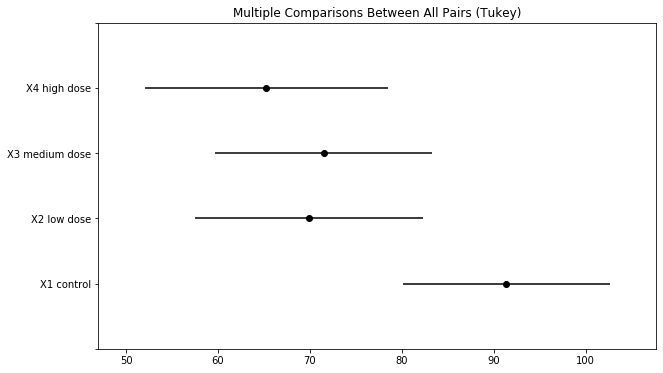

In [12]:
# and plot the group confidence intervals
tukey.plot_simultaneous()
plt.show()

### Intepreting the Results

The results of the Tukey test show that the only statistically significant difference is group X1 (the control) compared to group X4 (high dose). 